In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle
import json

import strucfunc
from strucfunc import sosflog
from bfunc import bfunc00,bfunc01,bfunc02



In [3]:
reg = 'Car'
line = 'CarB'

In [4]:
pickle_in = open('VFL//' + reg + '.pkl',"rb")
VF = pickle.load(pickle_in)
data = VF[line]

In [5]:
data.RV.var()

64.1908215763451

In [6]:
sig = data.RV.std()
sig2 = data.RV.var()

In [7]:
dlog=-0.2

In [8]:
table = sosflog(data,dlog)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
table

s                                                              \
        count      mean       std       min       25%       50%       75%   
ils                                                                         
0    107792.0  8.263682  1.538026  6.309576  7.042258  7.941798  9.113677   
1    112617.0  5.089443  0.666795  3.981072  4.510844  5.058385  5.654737   
2     75397.0  3.265500  0.419499  2.511887  2.906871  3.270197  3.630498   
3     38282.0  2.064356  0.266478  1.584949  1.837984  2.074235  2.296841   
4     17626.0  1.309667  0.167746  1.000124  1.167639  1.317545  1.457080   
5      7623.0  0.827351  0.105353  0.630986  0.739549  0.833140  0.919361   
6      3285.0  0.524339  0.066456  0.398433  0.468145  0.529955  0.583119   
7      1405.0  0.328446  0.040911  0.251392  0.297119  0.328419  0.362493   
8       496.0  0.208526  0.027621  0.158874  0.184845  0.213384  0.232547   
9       190.0  0.130977  0.017583  0.100705  0.117457  0.129921  0.147369   
10       75.0  0.081734  0.008711  0.066775  0.074702  0.081387  0.087029   
11       22.0  0.050118  0.005241  0.042258  0.047453  0.048143  0.055855   
12        6.0  0.033535  0.005119  0.027701  0.029191  0.033786  0.037469   
13        4.0  0.023084  0.001964  0.021383  0.021383  0.023084  0.024784   
17        1.0  0.003864       NaN  0.003864  0.003864  0.003864  0.003864   
18        1.0  0.002450       NaN  0.002450  0.002450  0.002450  0.002450   

                     dV2                                                       \
           max     count        mean         std     min        25%       50%   
ils                                                                             
0    17.667695  107792.0  180.690456  205.947308  0.0000  19.536400  97.81210   
1     6.309515  112617.0  125.185851  169.481561  0.0000   9.241600  45.69760   
2     3.981052   75397.0  107.989684  144.101979  0.0000  10.240000  47.33440   
3     2.511863   38282.0   90.475425  123.972202  0.0000   8.584900  38.81290   
4     1.584806   17626.0   66.121014  108.939484  0.0000   4.579600  20.34010   
5     0.999929    7623.0   47.012211   98.229504  0.0000   2.310400  11.42440   
6     0.630448    3285.0   36.426626   95.813989  0.0000   1.488400   6.96960   
7     0.398099    1405.0   21.842720   61.691898  0.0000   0.739600   3.57210   
8     0.250250     496.0   18.146722   65.243326  0.0000   0.393775   2.01640   
9     0.158369     190.0   19.761474   78.465133  0.0000   0.252525   1.45225   
10    0.099018      75.0    7.068995   17.308263  0.0001   0.255250   1.16640   
11    0.059852      22.0    5.184909    6.718293  0.0256   0.965775   2.06125   
12    0.039583       6.0    0.627817    0.875163  0.0001   0.087475   0.39485   
13    0.024784       4.0    2.589850    3.316854  0.3481   0.403900   1.30645   
17    0.003864       1.0    0.202500         NaN  0.2025   0.202500   0.20250   
18    0.002450       1.0    0.705600         NaN  0.7056   0.705600   0.70560   

                            
            75%        max  
ils                         
0    295.496100  2344.4964  
1    180.633600  1713.9600  
2    146.652100  1183.3600  
3    123.210000  1239.7441  
4     71.360275  1025.9209  
5     39.690000   948.6400  
6     23.328900  1143.7924  
7     12.110400   519.8400  
8      7.357675   574.5609  
9      3.960100   583.7056  
10     4.000100   102.0100  
11     6.923200    25.3009  
12     0.587100     2.3409  
13     3.492400     7.3984  
17     0.202500     0.2025  
18     0.705600     0.7056

In [10]:
s = 0.5 * (table[('s', 'min')] + table[('s', 'max')])
e_s = 0.5 * (table[('s', 'max')] - table[('s', 'min')])
b2 = table[('dV2', 'mean')]
ng = table[('dV2', 'count')]
e_b2 = table[('dV2', 'std')] / np.sqrt(ng)

In [11]:
r0 = np.interp(sig2, b2, s,period = 360)
r0

1.2442822788830254

In [12]:
r1 = np.interp(sig, b2, s,period = 360)
r1

0.09325260008173461

In [13]:
r2 = np.interp(2*sig2, b2, s, period = 360)
r2

5.53931289847139

In [14]:
#x = s
#y = b2 - sig2
#tck=interpolate.splrep(x,y,s=0)
#grid=np.linspace(x.min(),x.max(),num=len(x))
#ynew=interpolate.splev(grid,tck,der=0)
#inter=pd.DataFrame([grid,ynew]).T
#SFr=interpolate.sproot(tck)
#SFr

In [15]:
m = 1.2

In [16]:
rgrid = np.logspace(-2, 1)

(64.1908215763451, 1.2442822788830254, 1.2)

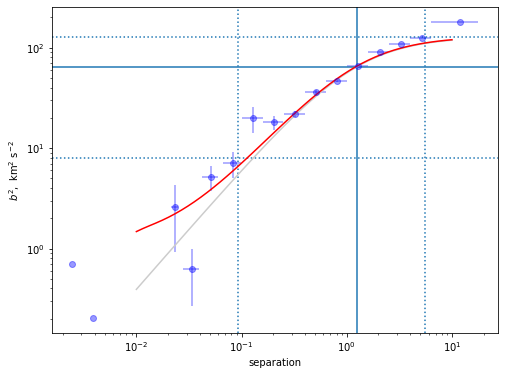

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.errorbar(s, b2, yerr=e_b2, xerr=e_s, fmt='o', alpha=0.4,color="blue")


ax.axhline(sig2, ls='-')
ax.axvline(r0, ls='-')

ax.axhline(2*sig2, ls=':')
ax.axvline(r2, ls=':')

ax.axhline(sig, ls=':')
ax.axvline(r1, ls=':')

ax.plot(rgrid, bfunc00(rgrid, r0, sig2, m), color="0.8")
ax.plot(rgrid, bfunc02(rgrid, r0, sig2, m, VF['s0'], b2.mean()*0.025), color="red")

ax.set(xscale='log', yscale='log', 
       xlabel='separation',
       ylabel=r'$b^2,\ \mathrm{km^2\ s^{-2}}$'
      )
None

sig2, r0, m

In [18]:
table

s                                                              \
        count      mean       std       min       25%       50%       75%   
ils                                                                         
0    107792.0  8.263682  1.538026  6.309576  7.042258  7.941798  9.113677   
1    112617.0  5.089443  0.666795  3.981072  4.510844  5.058385  5.654737   
2     75397.0  3.265500  0.419499  2.511887  2.906871  3.270197  3.630498   
3     38282.0  2.064356  0.266478  1.584949  1.837984  2.074235  2.296841   
4     17626.0  1.309667  0.167746  1.000124  1.167639  1.317545  1.457080   
5      7623.0  0.827351  0.105353  0.630986  0.739549  0.833140  0.919361   
6      3285.0  0.524339  0.066456  0.398433  0.468145  0.529955  0.583119   
7      1405.0  0.328446  0.040911  0.251392  0.297119  0.328419  0.362493   
8       496.0  0.208526  0.027621  0.158874  0.184845  0.213384  0.232547   
9       190.0  0.130977  0.017583  0.100705  0.117457  0.129921  0.147369   
10       75.0  0.081734  0.008711  0.066775  0.074702  0.081387  0.087029   
11       22.0  0.050118  0.005241  0.042258  0.047453  0.048143  0.055855   
12        6.0  0.033535  0.005119  0.027701  0.029191  0.033786  0.037469   
13        4.0  0.023084  0.001964  0.021383  0.021383  0.023084  0.024784   
17        1.0  0.003864       NaN  0.003864  0.003864  0.003864  0.003864   
18        1.0  0.002450       NaN  0.002450  0.002450  0.002450  0.002450   

                     dV2                                                       \
           max     count        mean         std     min        25%       50%   
ils                                                                             
0    17.667695  107792.0  180.690456  205.947308  0.0000  19.536400  97.81210   
1     6.309515  112617.0  125.185851  169.481561  0.0000   9.241600  45.69760   
2     3.981052   75397.0  107.989684  144.101979  0.0000  10.240000  47.33440   
3     2.511863   38282.0   90.475425  123.972202  0.0000   8.584900  38.81290   
4     1.584806   17626.0   66.121014  108.939484  0.0000   4.579600  20.34010   
5     0.999929    7623.0   47.012211   98.229504  0.0000   2.310400  11.42440   
6     0.630448    3285.0   36.426626   95.813989  0.0000   1.488400   6.96960   
7     0.398099    1405.0   21.842720   61.691898  0.0000   0.739600   3.57210   
8     0.250250     496.0   18.146722   65.243326  0.0000   0.393775   2.01640   
9     0.158369     190.0   19.761474   78.465133  0.0000   0.252525   1.45225   
10    0.099018      75.0    7.068995   17.308263  0.0001   0.255250   1.16640   
11    0.059852      22.0    5.184909    6.718293  0.0256   0.965775   2.06125   
12    0.039583       6.0    0.627817    0.875163  0.0001   0.087475   0.39485   
13    0.024784       4.0    2.589850    3.316854  0.3481   0.403900   1.30645   
17    0.003864       1.0    0.202500         NaN  0.2025   0.202500   0.20250   
18    0.002450       1.0    0.705600         NaN  0.7056   0.705600   0.70560   

                            
            75%        max  
ils                         
0    295.496100  2344.4964  
1    180.633600  1713.9600  
2    146.652100  1183.3600  
3    123.210000  1239.7441  
4     71.360275  1025.9209  
5     39.690000   948.6400  
6     23.328900  1143.7924  
7     12.110400   519.8400  
8      7.357675   574.5609  
9      3.960100   583.7056  
10     4.000100   102.0100  
11     6.923200    25.3009  
12     0.587100     2.3409  
13     3.492400     7.3984  
17     0.202500     0.2025  
18     0.705600     0.7056

In [19]:
Car = { 'VF' : data,
        'SF' : table,
        's' : s,
        'b2' : b2,
        'sig2' : sig2,
        'pc' : VF['pc'],
        'r0' : r0,
        'r1' : r1,
        'r2' : r2,
        's0' : VF['s0'],
        'm' : m}

In [20]:
f = open('SFresults\\'+ line + '.pkl',"wb")
pickle.dump(Car,f)
f.close()

class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

jsonfilename = f'SFresults//' + line +'.json'
with open(jsonfilename, "w") as f:
    json.dump(Car, fp=f, indent=3, cls=MyEncoder)
print(jsonfilename, end="")

In [21]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 5.842666149139404 seconds ---
